# ***Importation des bibliothèques***

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/final_df.csv')

In [3]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CompanyName
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,audi


# ***split data***

In [4]:
X = df.drop(['price','carwidth'], axis=1)
y = df['price']

In [5]:
#encoder les variables categorielle
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (164, 17)
Testing set shape: (41, 17)


In [7]:
#faire standarscaler pour les variables numerique
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)



# ***modeling***

In [8]:
model_evaluation = []

In [9]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Lasso CV': LassoCV(),
    'Ridge': Ridge(),
    'Ridge CV': RidgeCV(),
    'ElasticNet':ElasticNet(),
    'ElasticNetCV':ElasticNetCV(),
    'Xgb':XGBRegressor(),
    'rf_model':RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor()}

In [10]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_evaluation.append([name, mse, rmse, mae, r2])
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

results_df = pd.DataFrame(model_evaluation, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])
print("\nModel Evaluation Results:")
results_df

Linear Regression - MSE: 13220228.7734, RMSE: 3635.9633, MAE: 2432.3226, R2: 0.8325
Lasso - MSE: 13205675.3703, RMSE: 3633.9614, MAE: 2431.7867, R2: 0.8327
Lasso CV - MSE: 12207526.6134, RMSE: 3493.9271, MAE: 2389.3460, R2: 0.8454
Ridge - MSE: 13167735.3350, RMSE: 3628.7374, MAE: 2431.8606, R2: 0.8332
Ridge CV - MSE: 13057690.6292, RMSE: 3613.5427, MAE: 2438.9399, R2: 0.8346
ElasticNet - MSE: 14981746.5354, RMSE: 3870.6261, MAE: 2688.3102, R2: 0.8102
ElasticNetCV - MSE: 35408162.9960, RMSE: 5950.4759, MAE: 3983.8128, R2: 0.5515
Xgb - MSE: 5616910.7445, RMSE: 2370.0023, MAE: 1666.0338, R2: 0.9288
rf_model - MSE: 3488396.0933, RMSE: 1867.7248, MAE: 1279.3171, R2: 0.9558
Gradient Boosting - MSE: 5916188.1174, RMSE: 2432.3215, MAE: 1776.2260, R2: 0.9251

Model Evaluation Results:


,Model,MSE,RMSE,MAE,R2
0,Linear Regression,1.322023e+07,3635.963252,2432.322647,0.832537
1,Lasso,1.320568e+07,3633.961388,2431.786738,0.832721
2,Lasso CV,1.220753e+07,3493.927105,2389.345990,0.845365
3,Ridge,1.316774e+07,3628.737430,2431.860635,0.833202
4,Ridge CV,1.305769e+07,3613.542670,2438.939886,0.834596
5,ElasticNet,1.498175e+07,3870.626117,2688.310197,0.810223
6,ElasticNetCV,3.540816e+07,5950.475863,3983.812789,0.551478
7,Xgb,5.616911e+06,2370.002267,1666.033751,0.928849
8,rf_model,3.488396e+06,1867.724844,1279.317106,0.955812
9,Gradient Boosting,5.916188e+06,2432.321549,1776.226016,0.925058


/tmp/ipython-input-11-1614792301.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')


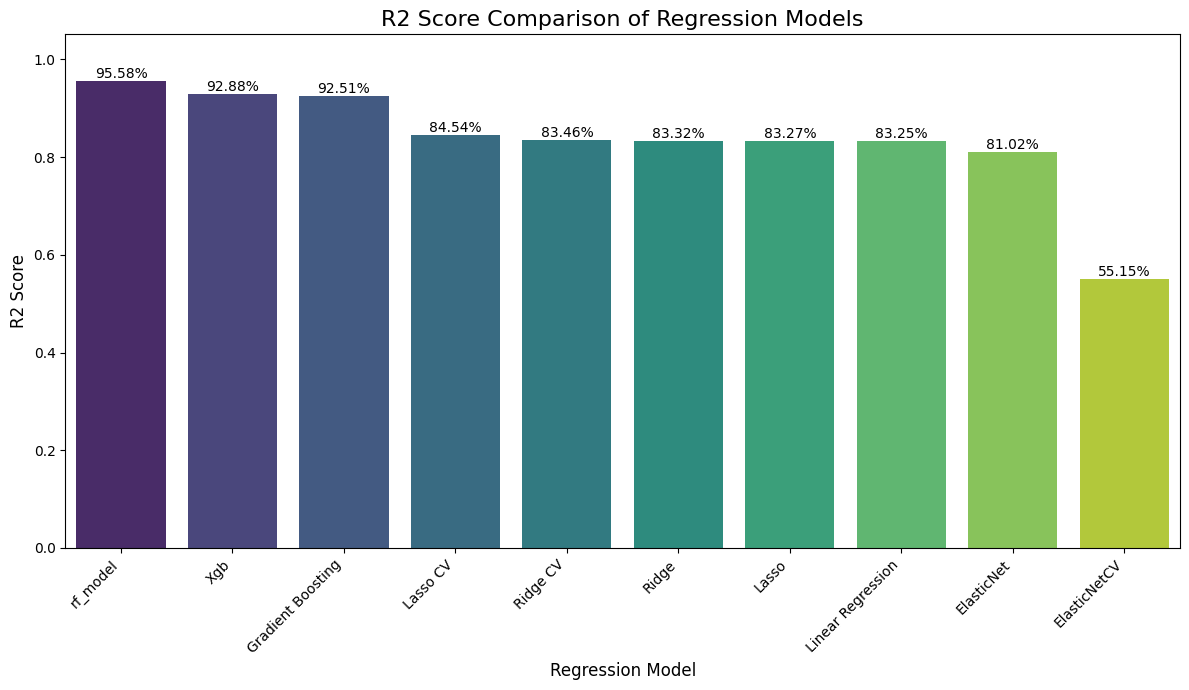

In [11]:
#comparison des resultat
results_df = results_df.sort_values('R2', ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('R2 Score Comparison of Regression Models', fontsize=16)
plt.xlabel('Regression Model', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(min(0, results_df['R2'].min() * 1.1), results_df['R2'].max() * 1.1)
plt.tight_layout()
plt.show()
